In [20]:
from titrato import align_pka, hungarian_pka, closest_pka,rmsd, msd
from titrato.sampl import get_experimental_pKa_data, get_typeiii_pka_data, data_dir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns




%matplotlib inline
sns.set_style("ticks")
font = {'size'   : 16}

matplotlib.rc('font', **font)

In [21]:
df_closest = pd.DataFrame(columns=["Molecule", "Experimental", "Experimental SEM", "Predicted", "Predicted SEM", "Cost"])
df_align = pd.DataFrame(columns=["Molecule", "Experimental", "Experimental SEM", "Predicted", "Predicted SEM", "Cost"])
df_hung =  pd.DataFrame(columns=["Molecule", "Experimental", "Experimental SEM", "Predicted", "Predicted SEM", "Cost"])

for molecule in range(24):
    mol_name = "SM{:02d}".format(molecule+1)
    print(mol_name)
    experimental_pkas = get_experimental_pKa_data(mol_name)
    predicted_pkas = get_typeiii_pka_data(mol_name, "Epik/typeIII-raw-sequential.csv")
    closest_match = closest_pka(experimental_pkas, predicted_pkas, rmsd)
    hung_match = hungarian_pka(experimental_pkas, predicted_pkas, msd)
    align_match = align_pka(experimental_pkas, predicted_pkas, rmsd)
    closest_match["Molecule"] = mol_name
    hung_match["Molecule"] = mol_name
    align_match["Molecule"] = mol_name
    df_closest = df_closest.append(closest_match, ignore_index=True)
    df_hung = df_hung.append(hung_match, ignore_index=True)
    df_align = df_align.append(align_match, ignore_index=True)
    

df_closest = df_closest.dropna(subset=["Experimental"])
df_hung = df_hung.dropna(subset=["Experimental"])
df_align = df_align.dropna(subset=["Experimental"])
    

SM01
SM02
SM03
SM04
SM05
SM06

C:\Users\rustenba\AppData\Local\Continuum\miniconda3\envs\pka-model\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)



SM07
SM08
SM09
SM10
SM11
SM12
SM13
SM14
SM15
SM16
SM17
SM18
SM19
SM20
SM21
SM22
SM23
SM24


In [35]:
def plot_correlation(dataframe, color='black'):
    """Plot correlation between experiment and prediction."""
   
    plt.clf()
    fig = plt.figure(figsize=[6,6], dpi=150)
    ax = plt.gca()    
    ax.errorbar(dataframe["Experimental"], dataframe["Predicted"], xerr=dataframe["Experimental SEM"], yerr=dataframe["Predicted SEM"], fmt='.', color=color, alpha =0.8)    
    ax.plot((0.0, 14.0),(0.0, 14.0), "k--",zorder=1)
    ax.plot((-1.0, 13.0),(0.0, 14.0), "gray",zorder=1 )
    ax.plot((1.0, 15.0),(0.0, 14.0), "gray",zorder=1 )
    ax.set_ylabel("Predicted pKa (+/- Epik uncertainty)")
    ax.set_xlabel("Experimental pKa (+/- SEM)")
    ax.set_xlim([1,13])
    ax.set_ylim([1,13])
    plt.xticks(np.arange(2.0, 14.0, 2.0))
    plt.yticks(np.arange(2.0, 14.0, 2.0))
    sns.despine(fig)
    return fig, ax

<Figure size 432x288 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

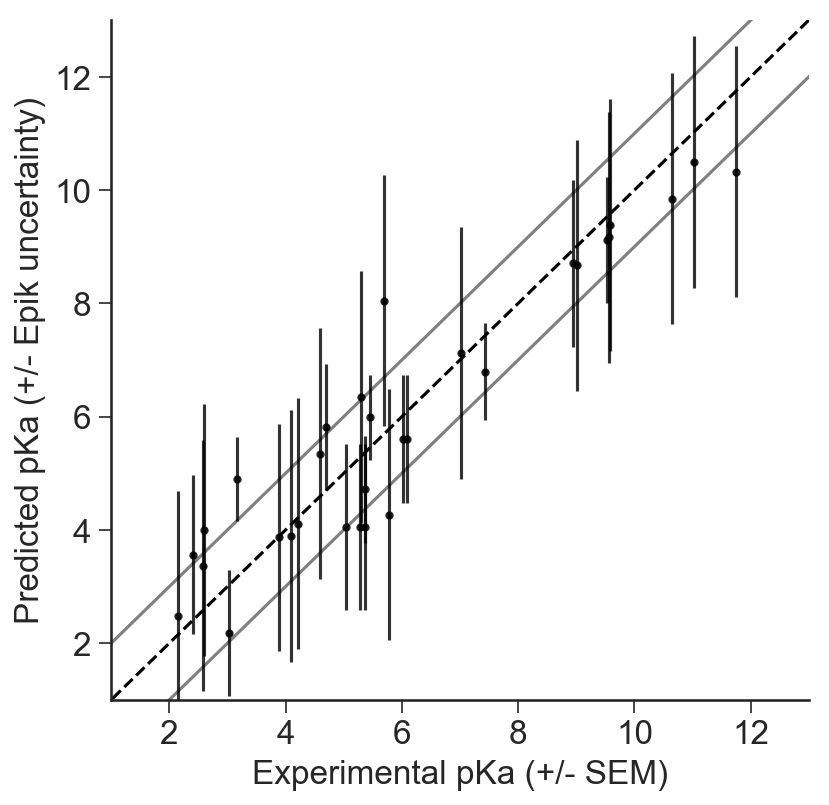

In [36]:
plot_correlation(df_closest)
plt.savefig("Epik_macropKa_closest_pka.png")
plot_correlation(df_align)
plt.savefig("Epik_macropKa_sequential_aligned_pka.png")
plot_correlation(df_hung)
plt.savefig("Epik_macropKa_hungarian_pka.png")
